# pandas io datareader practice 
#### 02/21/2017
####  

In [72]:
import pandas as pd 
import numpy as np
import pandas_datareader.data as web 
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
start = '1/1/2016'
end = '2/21/2017'
stock = 'amzn'

#### Detailed useage for stock market data

In [65]:
#historical stock price from yahoo finance
f1 = web.DataReader("amzn", 'yahoo', start, end)  # the first argu in DataReader is stock name 
# retrive the data based on the date
f1.ix['2017-01-04']

#Historical corporate actions (Dividends and Stock Splits) 
f2=web.DataReader('amzn', 'yahoo-actions', start, end)

#Historical dividends from Yahoo! Finance.
f3=web.DataReader("amzn", 'yahoo-dividends', start, end)

#YahooQuotesReader class allows to get quotes data from Yahoo! Finance.
f4=web.get_quote_yahoo('AMZN')

### price channel

In [19]:
def get_high(stock, start, end): 
     return web.get_data_yahoo(stock, start, end)['High']
def get_low(stock, start, end): 
     return web.get_data_yahoo(stock, start, end)['Low']
def get_close(stock, start, end): 
     return web.get_data_yahoo(stock, start, end)['Adj Close']

In [47]:
x = pd.DataFrame(get_high(stock, start,end))
x['Low'] = pd.DataFrame(get_low(stock, start, end))
x['Close'] = pd.DataFrame(get_close(stock, start,end))

In [48]:
x['4WH'] = x['High'].rolling(window=20,center= False).max()
x['4WL'] = x['Low'].rolling(window=20, center= False).max()
x['50 sma'] = x['Close'].rolling(window=20,center= False).max()

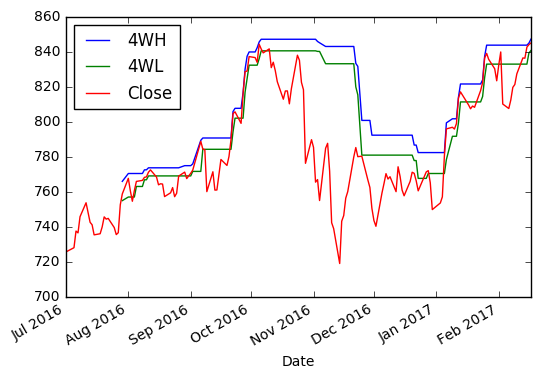

In [51]:
x.plot(y=['4WH', '4WL', 'Close'])

### Economics Data -- FRED

In [69]:
gdp = web.DataReader("GDP", "fred", '01/01/2013', '12/31/2016')

In [81]:
gdp.head()

,GDP
DATE,
2013-01-01,16475.4
2013-04-01,16541.4
2013-07-01,16749.3
2013-10-01,16999.9
2014-01-01,17025.2


In [78]:
# Fred can take multiple data name ex:
econ = web.DataReader(["GDP","CPIAUCSL", "CPILFESL"], "fred", '1/1/2013', '12/31/2016')

In [80]:
econ.head()

,GDP,CPIAUCSL,CPILFESL
DATE,,,
2013-01-01,16475.4,231.612,232.244
2013-02-01,NaN,232.985,232.603
2013-03-01,NaN,232.299,232.800
2013-04-01,16541.4,231.795,232.837
2013-05-01,NaN,231.916,233.064


### Economics Data -- World Bank

In [88]:
from  pandas_datareader import wb

In [91]:
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
685,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
7437,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$)
7439,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
7441,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


In [95]:
gdp2 = wb.download(indicator = 'NY.GDP.PCAP.KD', country=['US','CHN'],start= '01/01/2013',end='12/31/2016')

In [125]:
gdp2.iloc[:,0]

country        year
China          2016             NaN
               2015     6497.482305
               2014     6108.238642
               2013     5721.693695
United States  2016             NaN
               2015    51638.065207
               2014    50727.751210
               2013    49941.489109
Name: NY.GDP.PCAP.KD, dtype: float64

country
China            Axes(0.125,0.125;0.775x0.775)
United States    Axes(0.125,0.125;0.775x0.775)
dtype: object

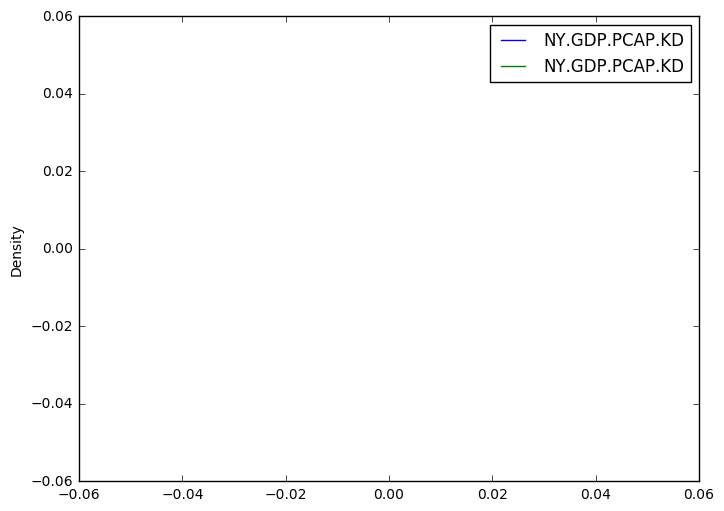

In [128]:
fig, ax = plt.subplots(figsize=(8,6))
gdp2.groupby(level=0).plot(kind='kde',ax=ax)
# use ax= ax 